# Multiple Inputs

In [8]:
from typing import TypedDict, List
from langgraph.graph import StateGraph 

In [9]:
class AgentState(TypedDict):
    values: List[int]
    name: str 
    result: str 

In [10]:

def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs"""
    print(state)

    state["result"] = f"Hi there {state["name"]}! Your sum = {sum(state["values"])}"

    print(state)
    return state

In [11]:
graph = StateGraph(AgentState)

graph.add_node("processor", process_values)
graph.set_entry_point("processor") # Set the starting node
graph.set_finish_point("processor") # Set the ending node

app = graph.compile() # Compiling the graph

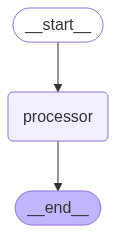

In [12]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
answers = app.invoke({"values": [1,2,3,4], "name": "Steve"})
{'values': [1, 2, 3, 4], 'name': 'Steve'}
{'values': [1, 2, 3, 4], 'name': 'Steve', 'result': 'Hi there Steve! Your sum = 10'}

{'values': [1, 2, 3, 4], 'name': 'Steve'}
{'values': [1, 2, 3, 4], 'name': 'Steve', 'result': 'Hi there Steve! Your sum = 10'}


{'values': [1, 2, 3, 4],
 'name': 'Steve',
 'result': 'Hi there Steve! Your sum = 10'}

In [14]:
print(answers["result"])

Hi there Steve! Your sum = 10
